In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [129]:
data = pd.read_csv('mymoviedb.csv', lineterminator='\n')


In [130]:
data.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [132]:
data.duplicated().sum()

0

In [133]:
data.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [134]:
data.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [135]:
# convert release data column from str to data time
data['Release_Date'] = pd.to_datetime(data['Release_Date'])


In [136]:
print(data['Release_Date'].dtype)

datetime64[ns]


In [137]:
data['Release_Date']=data['Release_Date'].dt.year

In [138]:
data.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [139]:
# Remove unnecessary columns from a dataset
cols=['Overview','Original_Language','Poster_Url']
data.drop(cols, axis=1, inplace=True)

In [140]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [141]:
def categorize_col(data,col,labels):
    edges=[data[col].describe()['min'],
           data[col].describe()['25%'],
           data[col].describe()['50%'],
           data[col].describe()['75%'],
           data[col].describe()['max'],]
    data[col]=pd.cut(data[col],edges,labels=labels,duplicates='drop')

    return data
           
          
          
           
        

In [142]:
labels=['not_popular','below_avg','average','popular']
categorize_col(data,'Vote_Average',labels)


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,not_popular,Horror
9824,2016,The Offering,13.355,94,not_popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"


In [143]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [144]:
data['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [145]:
data['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [146]:
data.dropna(inplace=True)

In [147]:
data['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular']
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [148]:
data.isnull().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [149]:
data['Genre']

0       Action, Adventure, Science Fiction
1                 Crime, Mystery, Thriller
2                                 Thriller
3       Animation, Comedy, Family, Fantasy
4         Action, Adventure, Thriller, War
                       ...                
9822                          Drama, Crime
9823                                Horror
9824             Mystery, Thriller, Horror
9825                 Music, Drama, History
9826           War, Drama, Science Fiction
Name: Genre, Length: 9727, dtype: object

# remove the white spaces from the Genre  column and
# we will split genre colum into a list and explod our datafram to have only one genre per row for each movie





In [150]:
data['Genre'] = data['Genre'].str.split(', ')

In [151]:
#.explode('Genre') creates a new row for each item in the list.
data = data.explode('Genre').reset_index(drop=True)


In [152]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  object  
dtypes: category(1), float64(1), int32(1), int64(1), object(2)
memory usage: 923.6+ KB


In [154]:
# casting columns into categories
data['Genre']=data['Genre'].astype('category')

In [155]:
data['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

# Data Visualization

# Q1 what is the most frrquent genere of movies  released on netflix


In [156]:
data['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

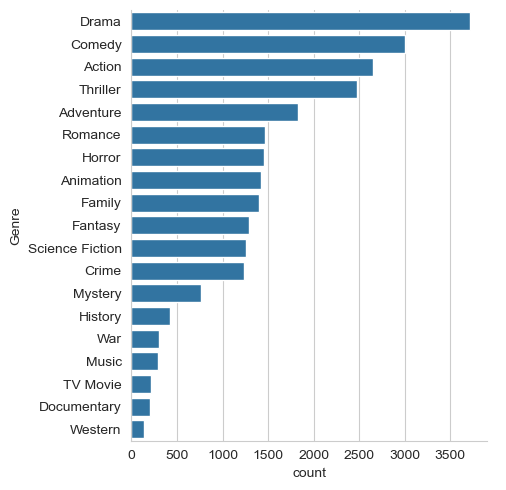

In [157]:
sns.set_style('whitegrid')
sns.catplot(y='Genre',data=data,kind='count',order=data['Genre'].value_counts().index)
#Tells Seaborn to create a count plot.

#A count plot shows how many times each category appears in the data.
#.index → Extracts the category names in order of frequency

# which has highest votes in vote_avergae coluymn

In [158]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


<Axes: xlabel='count', ylabel='Vote_Average'>

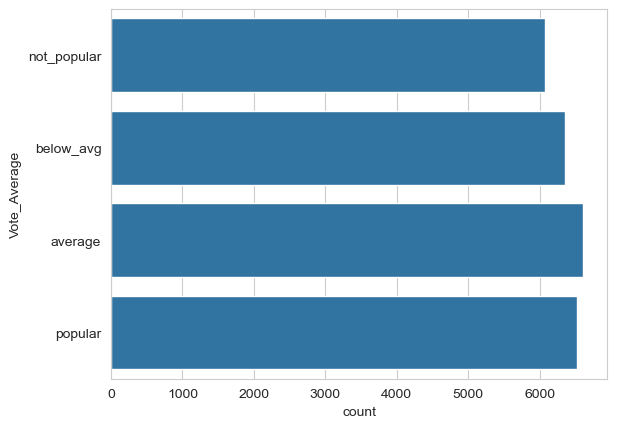

In [159]:
sns.countplot(data['Vote_Average'])

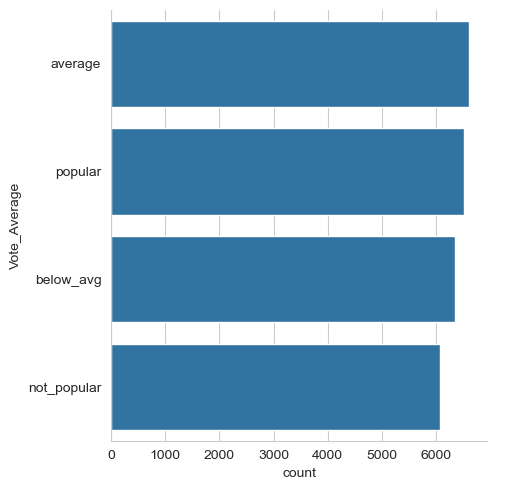

In [160]:
sns.catplot(y='Vote_Average',data=data,kind='count',order=data['Vote_Average'].value_counts().index)

# what movie got highest popularity rating?what is its genre

In [161]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


5083.954

In [174]:
data[data['Popularity'] == data['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# what movie got lowest popularity rating?what is its genre

In [175]:
data[data['Popularity'] == data['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


# which year has the most filmmed years

In [176]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


Text(0.5, 1.0, 'Release_Date  column distribution')

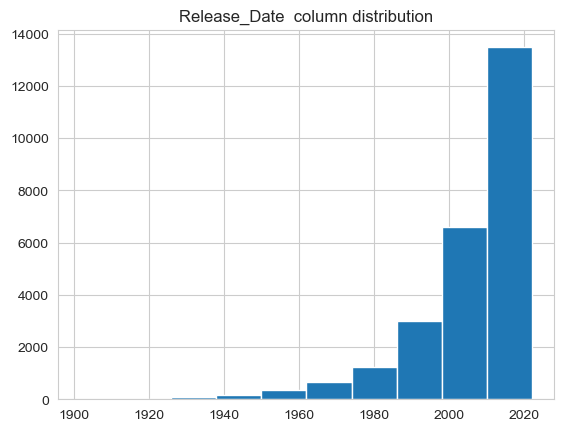

In [179]:
data['Release_Date'].hist()
plt.title('Release_Date  column distribution')

In [ ]:
Conclusion 
Q1 what is the most frequent genre in the dataset
Drama genre is the most frequent genre in our datasetand has appeared more than 14%of the times amoung other genres
Q2 what genre has highest votes
we have 25.5% of our dataset with popular votes(6520 rows) Drama againgetsthe highest popularity amongs fansby geing having more than 18.5%of  movies
Q3 what movie got the highest popularity ?what is its genre?
Spider-Man :No way  HOme has the highest popularity rate in our dataset and it has genre of Action ,Advanture and Sience Fiction

Q4 which year has the most filmmed Movies?
year 2020 has the highestflimmingrate
